In [2]:
import pandas
bike_rentals=pandas.read_csv('bike_rental_hour.csv')
print(bike_rentals.head())

   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  


(array([ 6972.,  3705.,  2659.,  1660.,   987.,   663.,   369.,   188.,
          139.,    37.]),
 array([   1. ,   98.6,  196.2,  293.8,  391.4,  489. ,  586.6,  684.2,
         781.8,  879.4,  977. ]),
 <a list of 10 Patch objects>)

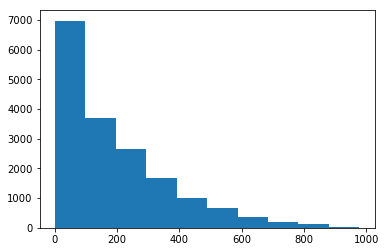

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.hist(bike_rentals['cnt'])

In [4]:
bike_rentals.corr()['cnt']

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

In [5]:
def assign_label (hour):
    if hour >=6 and hour<12:
        return 1
    elif hour >=12 and hour <18:
        return 2
    elif hour >=18 and hour <24:
        return 3
    elif hour >=0 and hour <6:
        return 4
bike_rentals['time_label']=bike_rentals['hr'].apply(assign_label)

In [6]:
bike_rentals.tail(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
17369,17370,2012-12-31,1,1,12,14,0,1,1,2,0.28,0.2727,0.45,0.2239,62,185,247,2
17370,17371,2012-12-31,1,1,12,15,0,1,1,2,0.28,0.2879,0.45,0.1343,69,246,315,2
17371,17372,2012-12-31,1,1,12,16,0,1,1,2,0.26,0.2576,0.48,0.1940,30,184,214,2
17372,17373,2012-12-31,1,1,12,17,0,1,1,2,0.26,0.2879,0.48,0.0896,14,150,164,2
17373,17374,2012-12-31,1,1,12,18,0,1,1,2,0.26,0.2727,0.48,0.1343,10,112,122,3
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,3
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,3
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,3
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61,3
17378,17379,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49,3


## Error metric

Since the cnt is a continuous variable, the mean squared error (MSE) will be a good measure for the error metric.

In [7]:
train=bike_rentals.sample (frac=.8)
bike_rentals.shape

(17379, 18)

In [8]:
test=bike_rentals.loc[~bike_rentals.index.isin(train.index)]
test.shape

(3476, 18)

In [9]:
predictors=list(train.columns)
predictors.remove('cnt')
predictors.remove('dteday')
predictors.remove('casual')
predictors.remove('registered')
predictors

['instant',
 'season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'time_label']

In [10]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train[predictors], train['cnt'])
predictions=lr.predict(test[predictors])

In [11]:
import numpy
numpy.mean((predictions-test['cnt'])**2)

17728.42623494525

In [12]:
print(round(predictions/test['cnt']))

8         12.0
9          8.0
16         1.0
19         2.0
22         3.0
30       103.0
32         6.0
43         6.0
45        13.0
48       -37.0
50       -22.0
53         1.0
64         1.0
72       -45.0
73       -25.0
85         1.0
87         1.0
88         2.0
95       -22.0
104        2.0
105        3.0
107        2.0
123        1.0
130        2.0
143        2.0
153        2.0
161       -4.0
163       -5.0
169        1.0
174        1.0
         ...  
17239     -4.0
17244      5.0
17245     14.0
17248      6.0
17263    -14.0
17269      3.0
17270      2.0
17271      2.0
17287      2.0
17291      1.0
17297      1.0
17298      1.0
17299      1.0
17300      1.0
17304      2.0
17305      3.0
17310     -5.0
17313     20.0
17321      1.0
17331     -1.0
17334     -0.0
17335      0.0
17344      1.0
17354      4.0
17355     -1.0
17356     -1.0
17364      1.0
17369      1.0
17373      1.0
17378      4.0
Name: cnt, Length: 3476, dtype: float64


## Note: The error was very high.

In [13]:
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor(min_samples_leaf=5)

reg.fit(train[predictors], train["cnt"])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [14]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

2505.2436162014455

In [15]:
reg = DecisionTreeRegressor(min_samples_leaf=2)

reg.fit(train[predictors], train["cnt"])

predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

3131.675321250479

In [16]:
from sklearn.ensemble import RandomForestRegressor

reg = RandomForestRegressor(min_samples_leaf=5)
reg.fit(train[predictors], train["cnt"])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=5,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

In [17]:
predictions = reg.predict(test[predictors])

numpy.mean((predictions - test["cnt"]) ** 2)

1986.828411799506

## Using random forest improved the model accuracy substantially with the mse dropped from approx. 2730 to 1886. And the random forest model is clearly a better model than the linear regression in this case.